# Supervised learning for the classification of Diabetes mellitus (Type 2 diabetes)

Each section, sub-section, and sub-sub-section in this notebook is collapsed by default to avoid clutter. 

Please expand them using the arrow next to them to view the contained code.

## Package imports

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
# SVC meaning support vector CLASSIFIER rather than machine.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

import missingno

## Ingestion and Integration

In [50]:
pima_df = pd.read_csv("Data/pima.csv")
pima_df.shape

(768, 9)

In [51]:
frankfurt_df = pd.read_csv("Data/frankfurt.csv")
frankfurt_df.shape

(2000, 9)

In [54]:
df = pd.concat([pima_df, frankfurt_df], axis = 0, ignore_index = True)
df.shape

(2768, 9)

In [52]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
frankfurt_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Exploratory Data Analysis (EDA)

### Missing value identification

In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


There is impossible data shown in this description, namely values of zero in the following columns:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

If any of these truly were 0 in a person, the person would not be alive.
These datasets do not include information on deceased patients. 

Therefore, this data can be interpreted as **missing data**,
and reformatted to the recognised NumPy NaN value.

In [56]:
df[["Glucose","Insulin","BloodPressure","SkinThickness","BMI"]] = df[["Glucose","Insulin","BloodPressure","SkinThickness","BMI"]].replace(0, np.nan)
df.isna().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

#### Missing values in the Insulin column

Hayashi and Yukita (2016)'s paper researched this issue, discovering that these zeroes truly are missing values that were missing due to experimental invalidity.
Please see Section X of the accompanying report for a more detailed description on this matter.

#### Missingno Graphs

On this bar chart, the numbers above each bar are how many rows are present, and not how many are missing. The counts of the missing values were shown in the previous cell 
"df.isna().sum()"

<Axes: >

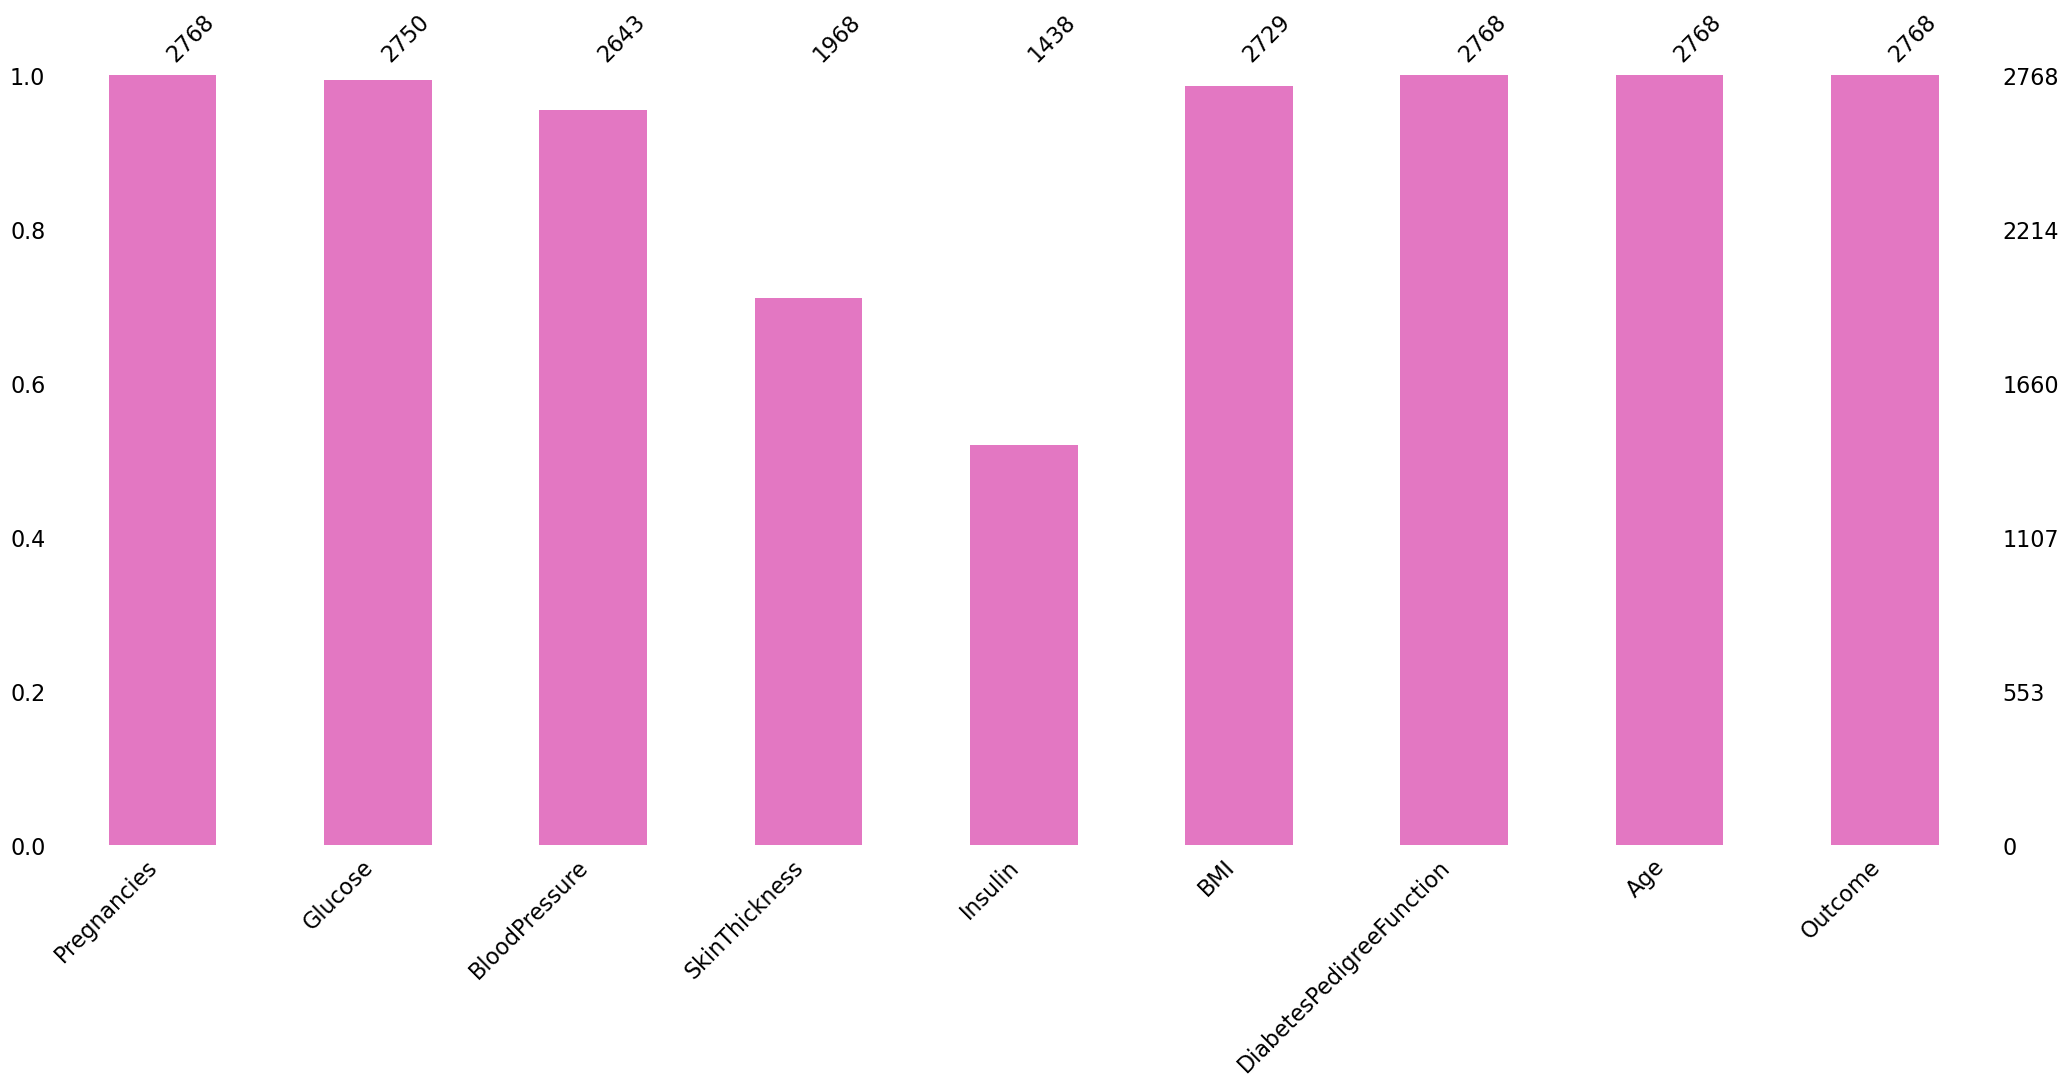

In [57]:
missingno.bar(df, color = "tab:pink")

<Axes: >

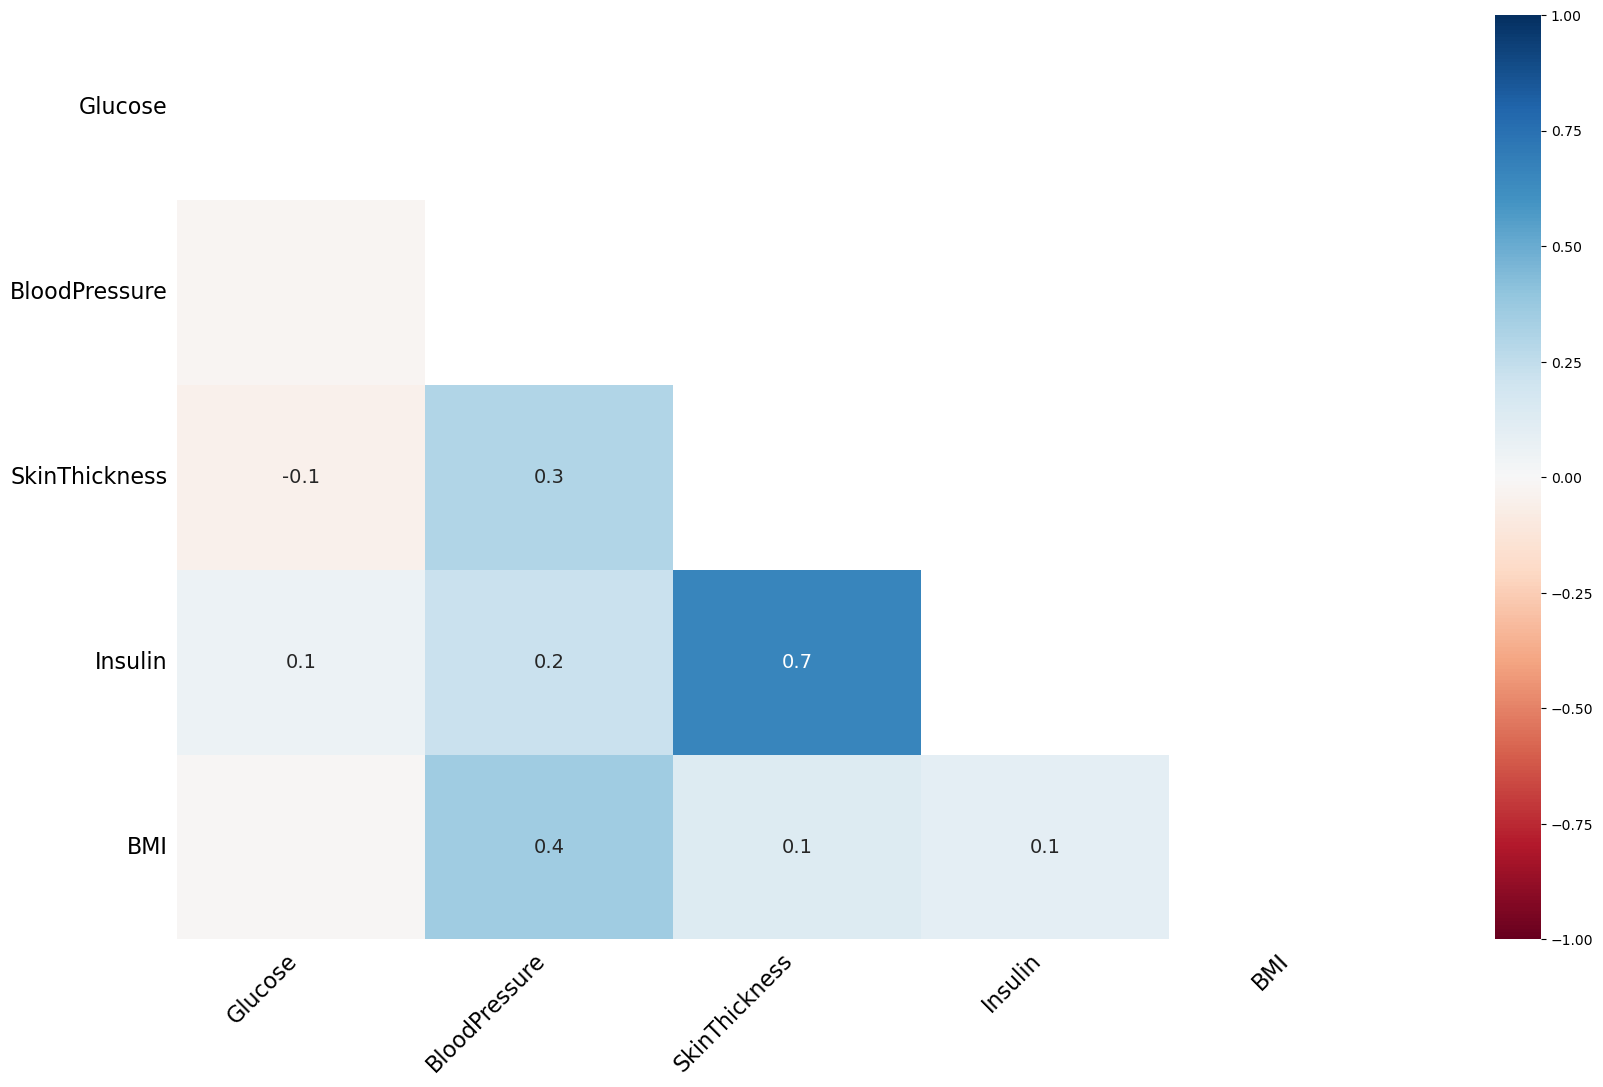

In [46]:
missingno.heatmap(df)

<Axes: >

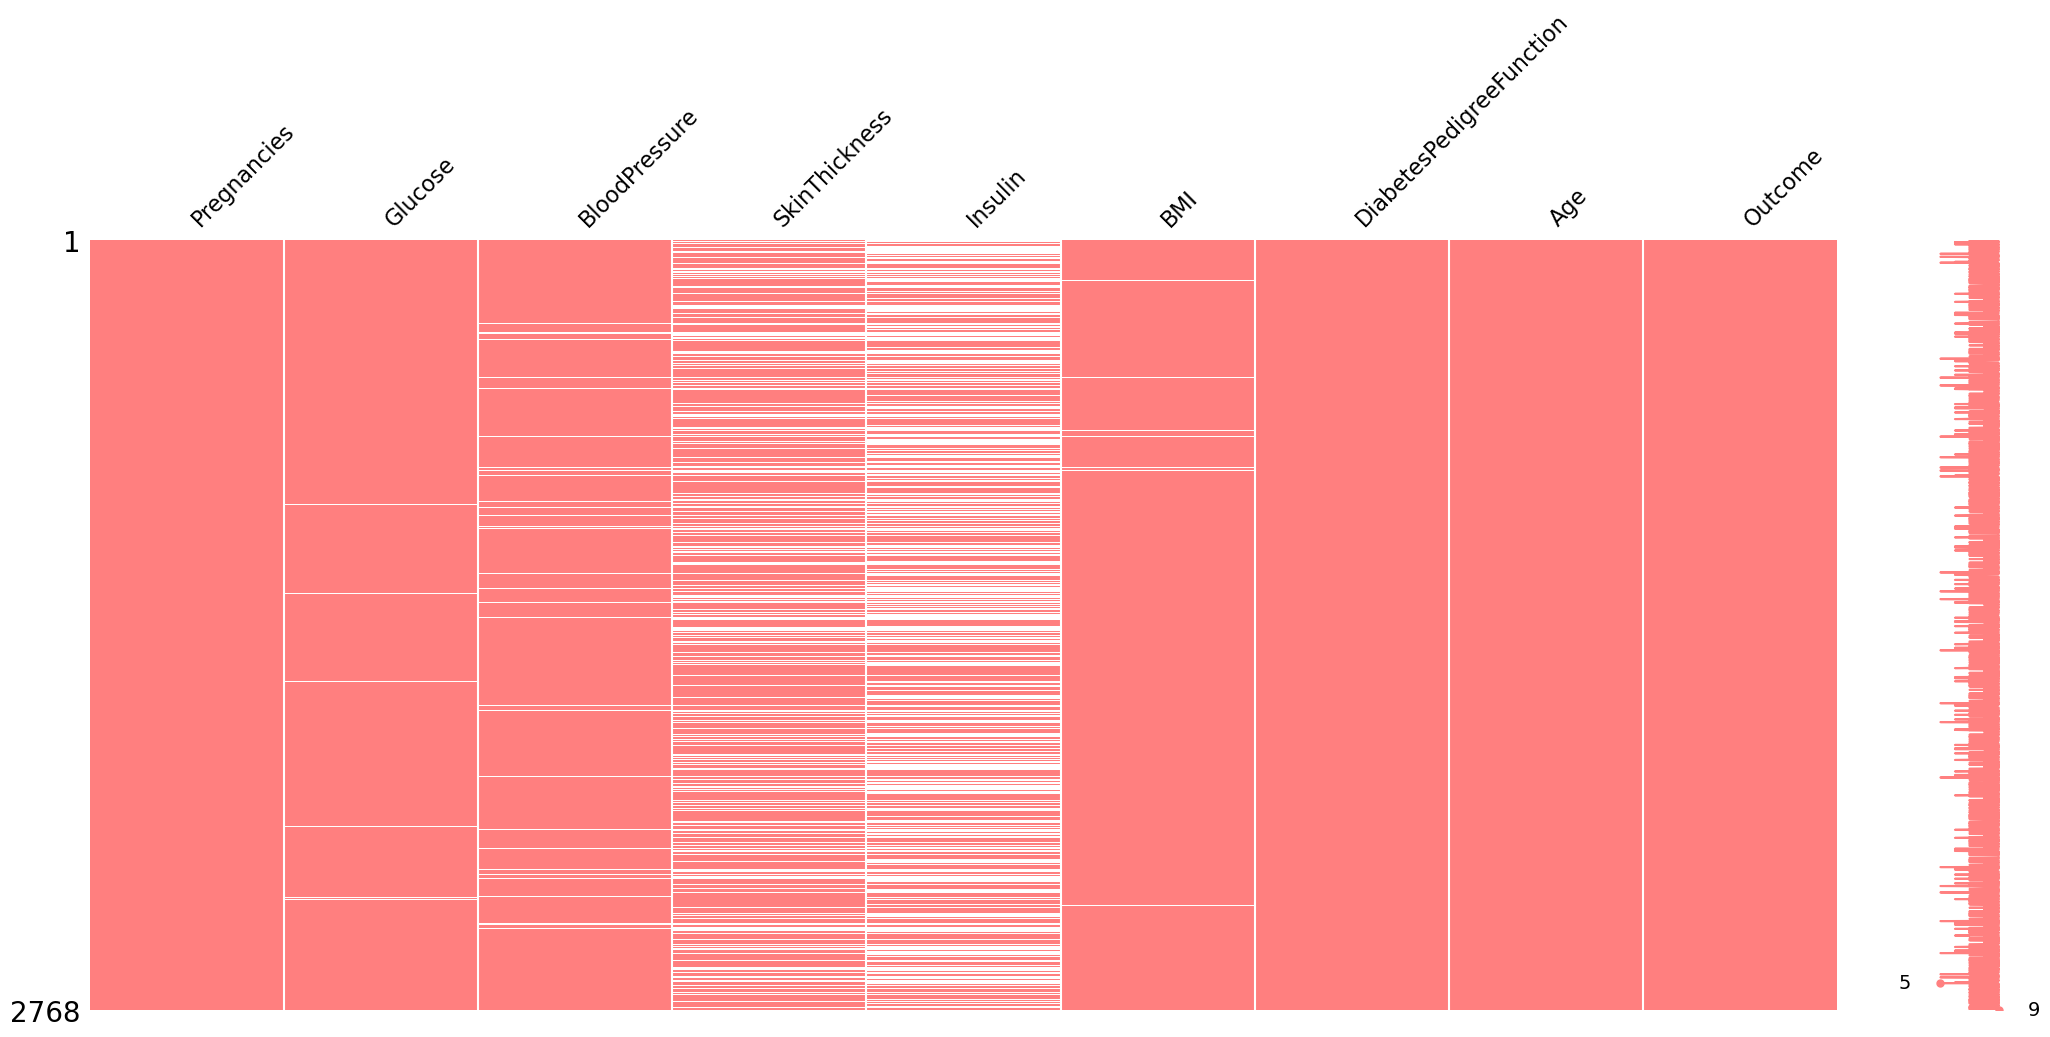

In [43]:
missingno.matrix(df, color = (1, 0.5, 0.5)) # Missingno's matrix colors are RGB from 0 to 1.

### Splitting the data

In [58]:
X = df.drop(columns = "Outcome", axis = 1)
y = df["Outcome"]

In [59]:
print(X.shape)
print(y.shape) # No columns because y is now a Series.

(2768, 8)
(2768,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Boxplots

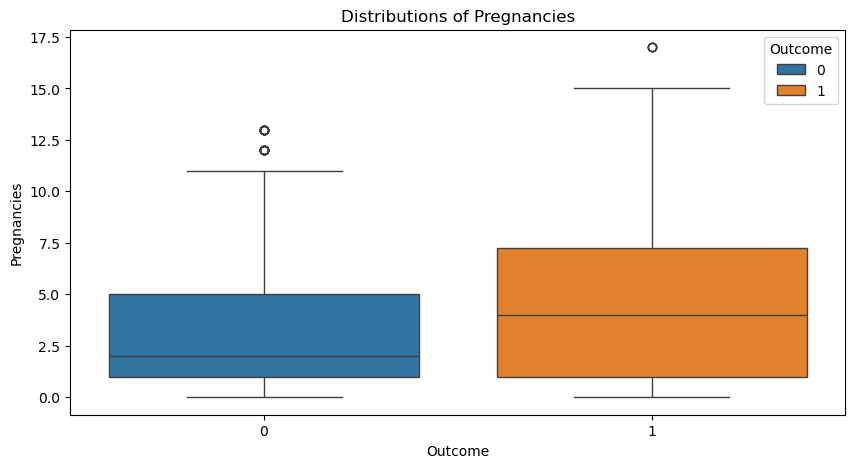

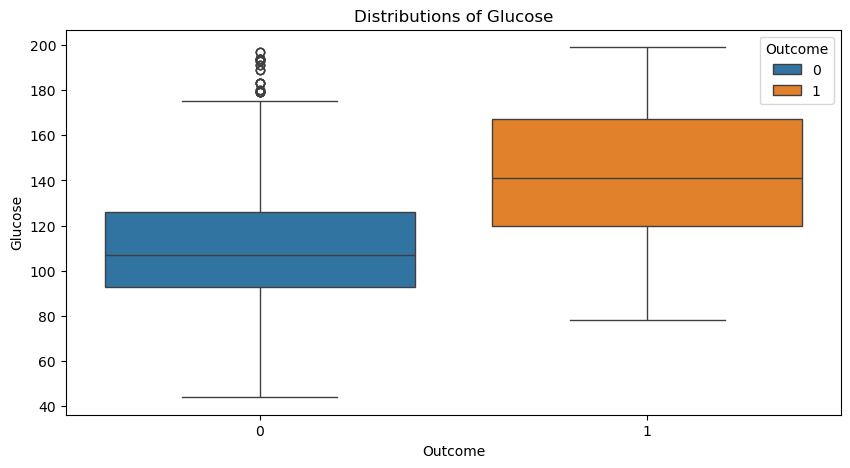

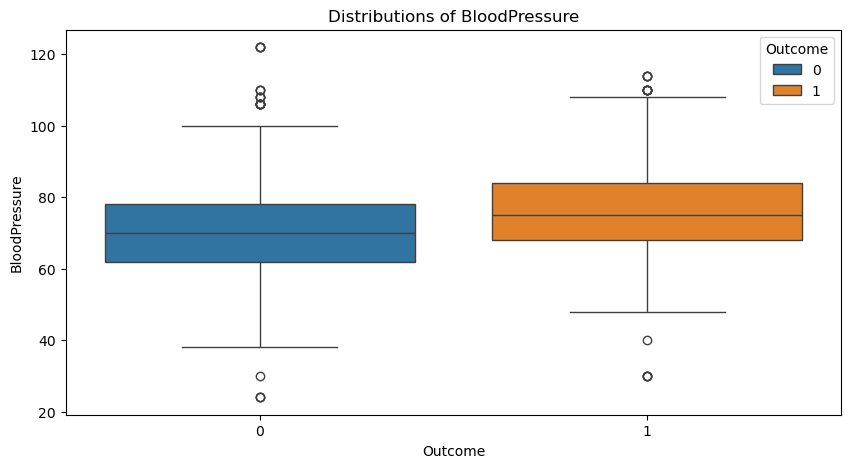

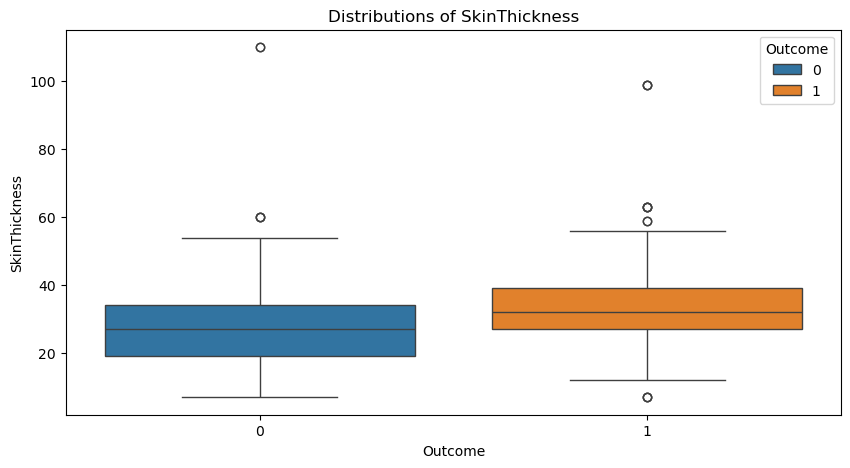

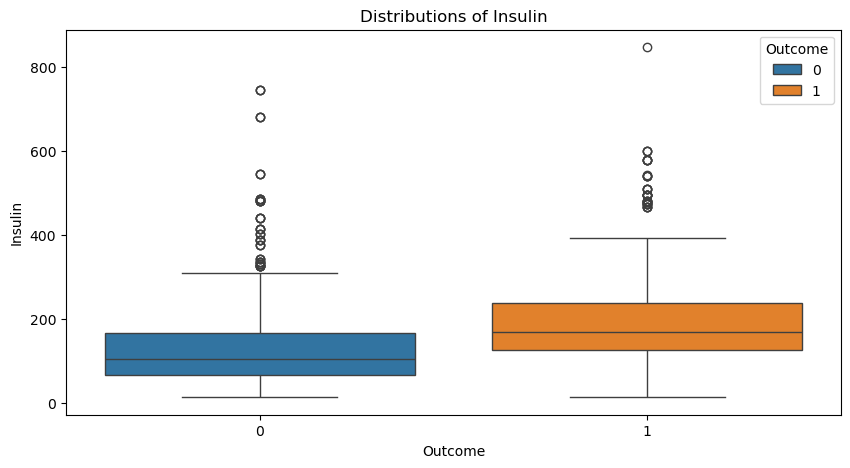

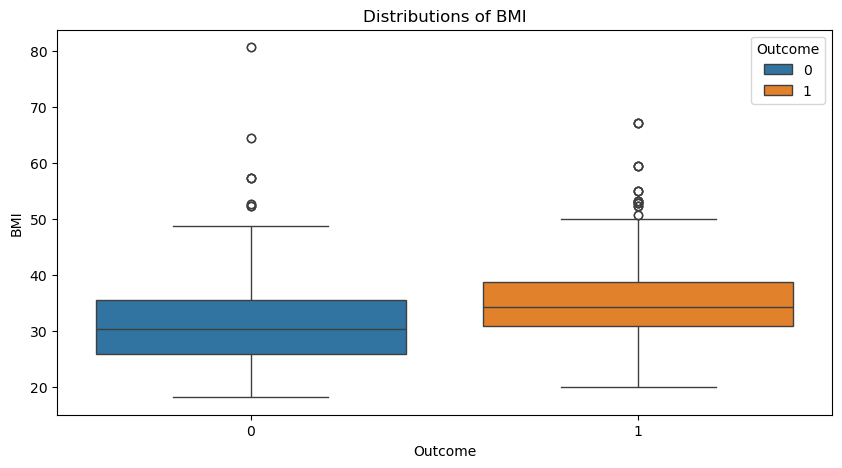

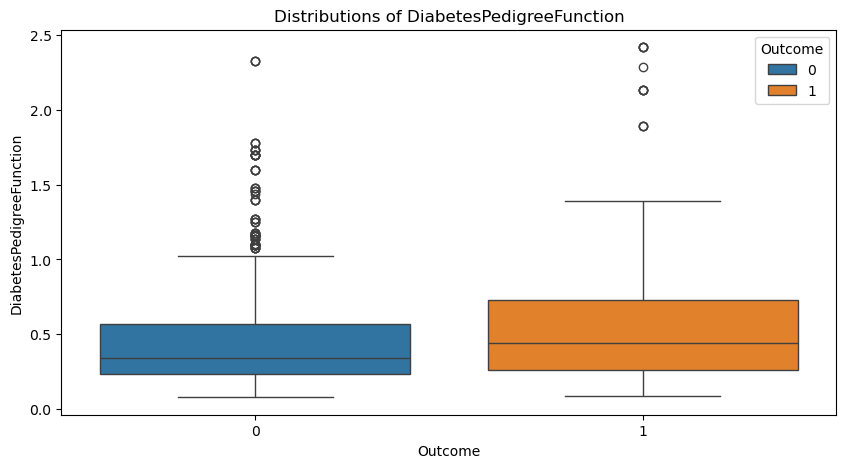

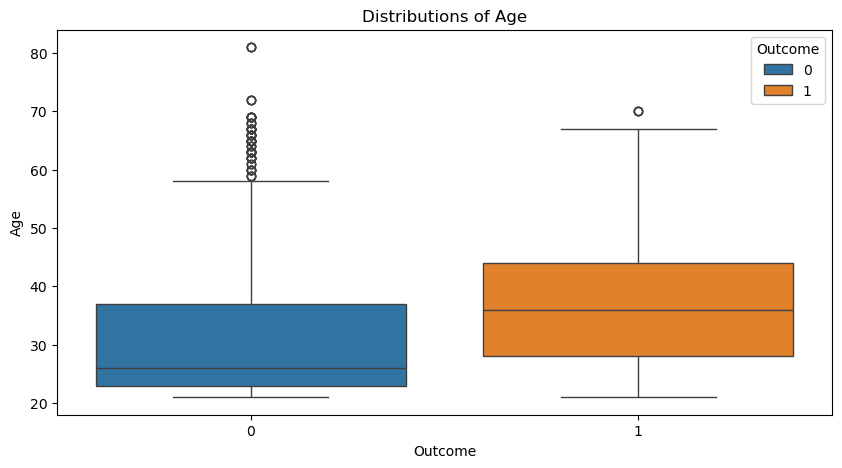

In [88]:
for col in X_train:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data = df, y = col, x = y, hue = y)
    # While "x = y" is somewhat illogical, it's important to know that "y" is the Outcome column.
    plt.title(f'Distributions of {col}')
    plt.show()

In [27]:
# This seems way more manageable? These outliers are all physically possible (other than absurd BMIs?) and are still valuable data points. I think they should be kept.

#### Correlation matrix

<Axes: >

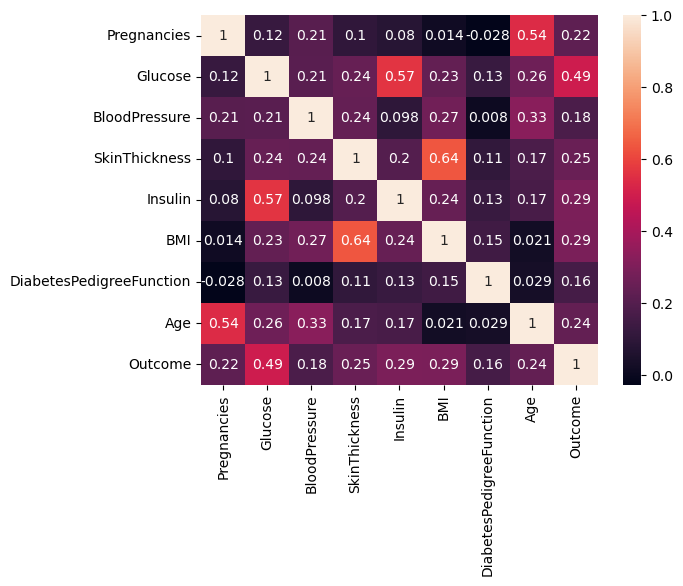

In [89]:
sns.heatmap(df.corr(), annot = True)